In [1]:
#เชื่อม google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#ระบุที่อยู่ folder ของตัวเอง
%cd "/content/drive/MyDrive/Machine_Learning/Car_Dekho_Price_Regression"

/content/drive/MyDrive/Machine_Learning/Car_Dekho_Price_Regression


# **Data Science Life Cycle**

## **Business Understanding & Problem Definition**

**1.1 Business Understanding (การทำความเข้าใจธุรกิจ)**
ในบริบทของการทำนายราคาของรถยนต์มือสอง (Used Car Price Prediction) เรากำลังมองหาว่าโมเดลที่เราจะสร้างขึ้นมานั้น จะมีประโยชน์ต่อใครบ้าง และจะนำไปใช้ในสถานการณ์ใด

**ผู้ที่ได้รับประโยชน์:**
ผู้ซื้อรถยนต์มือสอง: ต้องการทราบราคาที่เหมาะสมเพื่อไม่ให้ถูกเอาเปรียบ และตัดสินใจซื้อรถยนต์ที่มีมูลค่าสมเหตุสมผล

**ผู้ขายรถยนต์มือสอง (บุคคลทั่วไปหรือเต็นท์รถ):** ต้องการตั้งราคาขายรถยนต์ของตนให้เหมาะสมกับตลาด เพื่อดึงดูดผู้ซื้อและขายได้อย่างรวดเร็ว โดยไม่ตั้งราคาที่สูงเกินไปจนขายไม่ได้ หรือต่ำเกินไปจนเสียผลประโยชน์

**บริษัทไฟแนนซ์ / สถาบันการเงิน:** ต้องการประเมินมูลค่ารถยนต์ที่จะใช้เป็นหลักประกันในการปล่อยสินเชื่อ เพื่อบริหารความเสี่ยงและกำหนดอัตราดอกเบี้ยที่เหมาะสม

**บริษัทประกันภัย:** ใช้ในการประเมินมูลค่ารถยนต์เพื่อกำหนดเบี้ยประกัน หรือประเมินมูลค่าความเสียหายเมื่อเกิดอุบัติเหตุ

**แพลตฟอร์มซื้อขายรถยนต์ออนไลน์:**สามารถใช้โมเดลนี้เพื่อเป็นเครื่องมือในการแนะนำราคา หรือสร้างความน่าเชื่อถือให้กับแพลตฟอร์ม

**ปัญหาทางธุรกิจที่ต้องการแก้ไข:**

**ความไม่แน่นอนของราคา:** ตลาดรถยนต์มือสองมีปัจจัยซับซ้อนมากมายที่ส่งผลต่อราคา ทำให้ผู้ซื้อและผู้ขายประสบปัญหาในการกำหนดราคาที่ยุติธรรม

**ข้อมูลที่ไม่ครบถ้วน:**
บางครั้งผู้ซื้อหรือผู้ขายอาจไม่มีข้อมูลครบถ้วนเกี่ยวกับปัจจัยที่ส่งผลต่อราคา ทำให้การตัดสินใจเป็นไปอย่างไม่แม่นยำ

**การเสียเวลาและทรัพยากร:**
การประเมินราคาด้วยตนเองอาจใช้เวลานานและต้องใช้ความเชี่ยวชาญ

**1.2 Problem Definition (การกำหนดปัญหา)**
จากความเข้าใจทางธุรกิจข้างต้น เราสามารถกำหนดปัญหาของโปรเจกต์นี้ได้อย่างชัดเจน:

เป้าหมายหลัก:
สร้างโมเดล Machine Learning ที่สามารถทำนายราคาขายของรถยนต์มือสองในสหรัฐอเมริกาได้อย่างแม่นยำ

**ประเภทของปัญหา:**
นี่คือปัญหาทางสถิติประเภท Regression (การถดถอย) เนื่องจากตัวแปรที่เราต้องการทำนาย (ราคา) เป็นค่าตัวเลขต่อเนื่อง (Continuous Numerical Value)

**ตัวแปรเป้าหมาย (Target Variable):**
price (ราคาขายรถยนต์)

**ตัวแปรคุณลักษณะ (Features / Independent Variables):**
เราจะใช้ฟีเจอร์ต่างๆ ที่เกี่ยวข้องกับรถยนต์ เช่น ยี่ห้อ, รุ่น, ปีที่ผลิต, ระยะทางที่วิ่ง, ประเภทเชื้อเพลิง, ระบบเกียร์, สภาพรถ, และข้อมูลอื่นๆ ที่มีอยู่ใน Dataset เพื่อสร้างโมเดล

**ผลลัพธ์ที่คาดหวัง:**
เมื่อเราสร้างโมเดลนี้สำเร็จ เราคาดหวังว่าจะได้โมเดลที่สามารถรับข้อมูลคุณลักษณะของรถยนต์มือสอง (เช่น ยี่ห้อ, รุ่น, ปี, ระยะทาง) และให้ผลลัพธ์เป็นการคาดการณ์ราคาขายที่ใกล้เคียงกับราคาจริงมากที่สุด โมเดลนี้จะช่วยลดความไม่แน่นอนในการซื้อขายรถยนต์มือสอง และเป็นเครื่องมือที่มีคุณค่าสำหรับผู้ที่เกี่ยวข้องในตลาดนี้

## **Data Understanding & Data Collection**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported Susscessfully")

Libraries imported Susscessfully


In [4]:
df =pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
df.shape

(4340, 8)

In [7]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [8]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [9]:
df.nunique()

,0
name,1491
year,27
selling_price,445
km_driven,770
fuel,5
seller_type,3
transmission,2
owner,5


In [10]:
print('Unique values in key object columns:')
for col in ['fuel', 'seller_type', 'transmission', 'owner']:
  if col in df.columns:
        print(f"\n{col}: {df[col].unique()}")

Unique values in key object columns:

fuel: ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']

seller_type: ['Individual' 'Dealer' 'Trustmark Dealer']

transmission: ['Manual' 'Automatic']

owner: ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


## **Data Wrangling (Data Preparation/Cleaning)**

In [11]:
df_processed =df.copy()
df_processed['brand'] =df_processed['name'].apply(lambda x: x.split()[0])
df_processed['brand'].unique()

array(['Maruti', 'Hyundai', 'Datsun', 'Honda', 'Tata', 'Chevrolet',
       'Toyota', 'Jaguar', 'Mercedes-Benz', 'Audi', 'Skoda', 'Jeep',
       'BMW', 'Mahindra', 'Ford', 'Nissan', 'Renault', 'Fiat',
       'Volkswagen', 'Volvo', 'Mitsubishi', 'Land', 'Daewoo', 'MG',
       'Force', 'Isuzu', 'OpelCorsa', 'Ambassador', 'Kia'], dtype=object)

In [12]:
print(df_processed['brand'].value_counts().head(10))

brand
Maruti        1280
Hyundai        821
Mahindra       365
Tata           361
Honda          252
Ford           238
Toyota         206
Chevrolet      188
Renault        146
Volkswagen     107
Name: count, dtype: int64


In [13]:
df_processed.drop(columns=['name'], axis =1, inplace=True)
df_processed.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


In [14]:
# เราจะสมมติว่าปีปัจจุบันคือปี 2020 (ซึ่งเป็นปีสูงสุดใน dataset จาก df.describe())
current_year = 2020
df_processed['Car_Age'] = current_year - df_processed['year']

print(f"\n'Car_Age' column created. Min Age: {df_processed['Car_Age'].min()}, Max Age: {df_processed['Car_Age'].max()}")

# เราจะลบคอลัมน์ 'Year' ทิ้งไป เพราะเรามี 'Car_Age' แล้ว
df_processed.drop('year', axis=1, inplace=True)
print("'Year' column dropped.")


'Car_Age' column created. Min Age: 0, Max Age: 28
'Year' column dropped.


In [15]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [16]:
df_processed['owner'].value_counts()

,count
owner,
First Owner,2832
Second Owner,1106
Third Owner,304
Fourth & Above Owner,81
Test Drive Car,17


In [17]:
test_drive_count = df_processed[df_processed['owner'] == 'Test Drive Car'].shape[0]
print(f"\nNumber of 'Test Drive Car' entries: {test_drive_count}")


Number of 'Test Drive Car' entries: 17


In [18]:
df_processed= df_processed[df_processed['owner'] != 'Test Drive Car']

In [19]:
df_processed['owner'].value_counts()

,count
owner,
First Owner,2832
Second Owner,1106
Third Owner,304
Fourth & Above Owner,81


In [20]:
owner_mapping ={
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4
}

df_processed['owner'] = df_processed['owner'].map(owner_mapping)
print("\n'owner' column after Ordinal Encoding (and dropping 'Test Drive Car' if applicable):")
print(df_processed['owner'].value_counts())
print(df_processed['owner'].unique())


'owner' column after Ordinal Encoding (and dropping 'Test Drive Car' if applicable):
owner
1    2832
2    1106
3     304
4      81
Name: count, dtype: int64
[1 2 4 3]


In [21]:
df_processed.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,Car_Age
0,60000,70000,Petrol,Individual,Manual,1,Maruti,13
1,135000,50000,Petrol,Individual,Manual,1,Maruti,13
2,600000,100000,Diesel,Individual,Manual,1,Hyundai,8
3,250000,46000,Petrol,Individual,Manual,1,Datsun,3
4,450000,141000,Diesel,Individual,Manual,2,Honda,6


In [22]:
df_processed.nunique()

,0
selling_price,436
km_driven,764
fuel,5
seller_type,3
transmission,2
owner,4
brand,29
Car_Age,27


In [23]:
categorical_cols_onehot =['brand', 'fuel', 'seller_type', 'transmission']
df_processed =pd.get_dummies(df_processed, columns=categorical_cols_onehot, drop_first=True)
df_processed.head()

,selling_price,km_driven,owner,Car_Age,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,brand_Fiat,...,brand_Toyota,brand_Volkswagen,brand_Volvo,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,60000,70000,1,13,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,True
1,135000,50000,1,13,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,True
2,600000,100000,1,8,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True
3,250000,46000,1,3,False,False,False,False,True,False,...,False,False,False,False,False,False,True,True,False,True
4,450000,141000,2,6,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True


In [24]:
df_processed.shape

(4323, 39)

## **Exploratory Data Analysis (EDA) & Data Visualization**

In [25]:
df_processed.describe()

,selling_price,km_driven,owner,Car_Age
count,4.323000e+03,4323.000000,4323.000000,4323.000000
mean,5.023571e+05,66459.828591,1.452695,6.934536
std,5.787944e+05,46570.974347,0.707773,4.203865
min,2.000000e+04,1.000000,1.000000,0.000000
25%,2.029990e+05,35000.000000,1.000000,4.000000
50%,3.500000e+05,60000.000000,1.000000,6.000000
75%,6.000000e+05,90000.000000,2.000000,9.000000
max,8.900000e+06,806599.000000,4.000000,28.000000


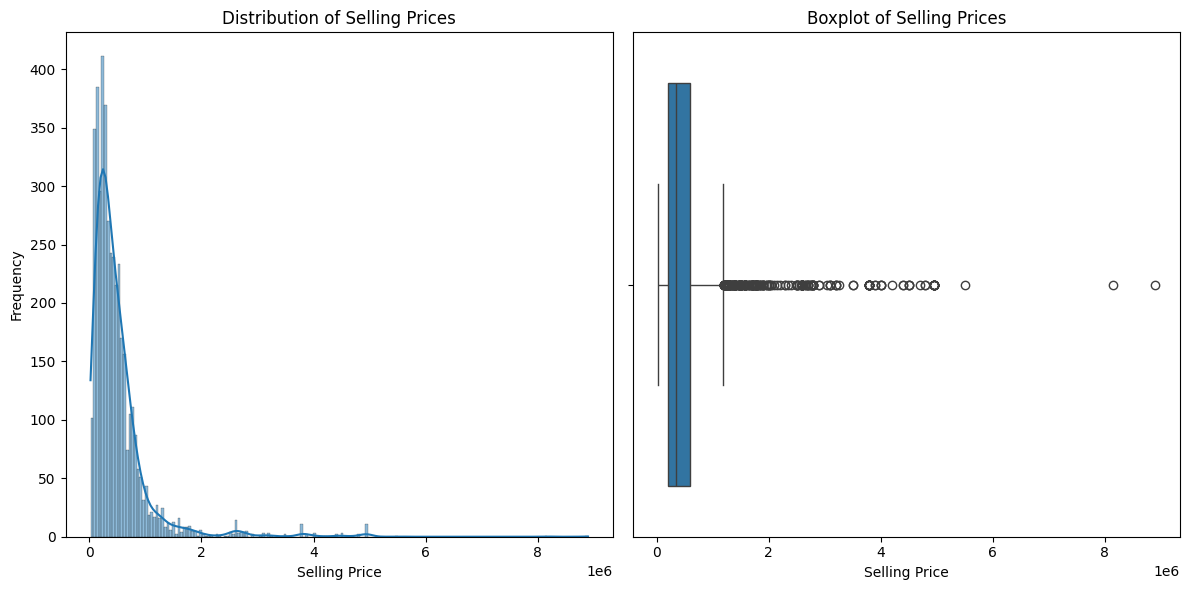

In [26]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_processed['selling_price'], kde=True)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_processed['selling_price'])
plt.title('Boxplot of Selling Prices')
plt.xlabel('Selling Price')

plt.tight_layout()
plt.show()

In [27]:
skewness = df_processed['selling_price'].skew()
print(f"Skewness of Selling Prices: {skewness}")

Skewness of Selling Prices: 4.910676561697352


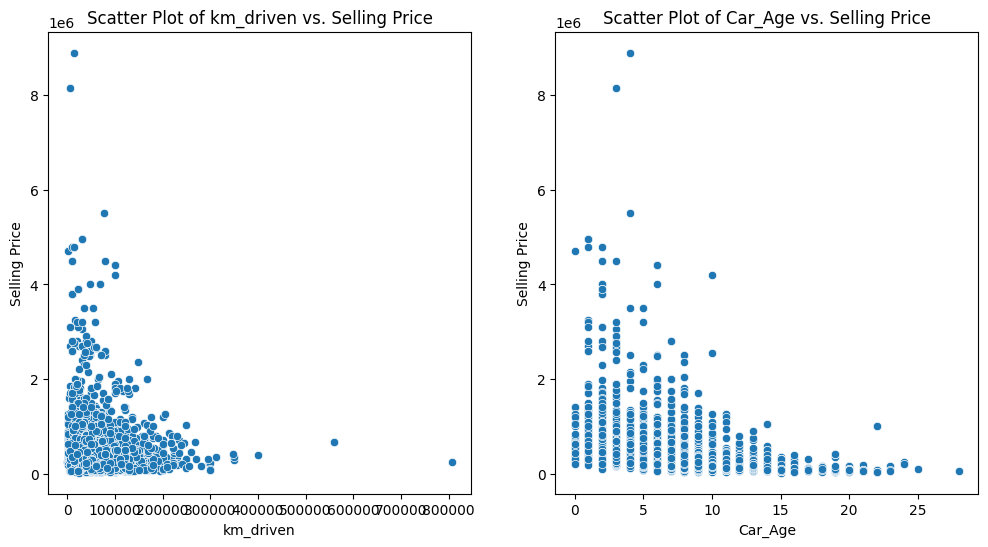

In [28]:
numeric_feature =['km_driven', 'Car_Age']
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numeric_feature):
  plt.subplot(1, 2, i+1)
  sns.scatterplot(x=df_processed[feature], y=df_processed['selling_price'])
  plt.title(f'Scatter Plot of {feature} vs. Selling Price')
  plt.xlabel(feature)
  plt.ylabel('Selling Price')
plt.tight_layout
plt.show()


In [29]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [30]:
df['brand'] =df['name'].apply(lambda x: x.split()[0])
df['brand'].unique()

array(['Maruti', 'Hyundai', 'Datsun', 'Honda', 'Tata', 'Chevrolet',
       'Toyota', 'Jaguar', 'Mercedes-Benz', 'Audi', 'Skoda', 'Jeep',
       'BMW', 'Mahindra', 'Ford', 'Nissan', 'Renault', 'Fiat',
       'Volkswagen', 'Volvo', 'Mitsubishi', 'Land', 'Daewoo', 'MG',
       'Force', 'Isuzu', 'OpelCorsa', 'Ambassador', 'Kia'], dtype=object)

In [31]:
df_for_plotting =df.copy()

In [32]:
df_for_plotting =df_for_plotting[df_for_plotting['brand'] != 'Test Drive Car']
owner_mapping ={
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4
}
df_for_plotting['owner'] = df_for_plotting['owner'].map(owner_mapping)

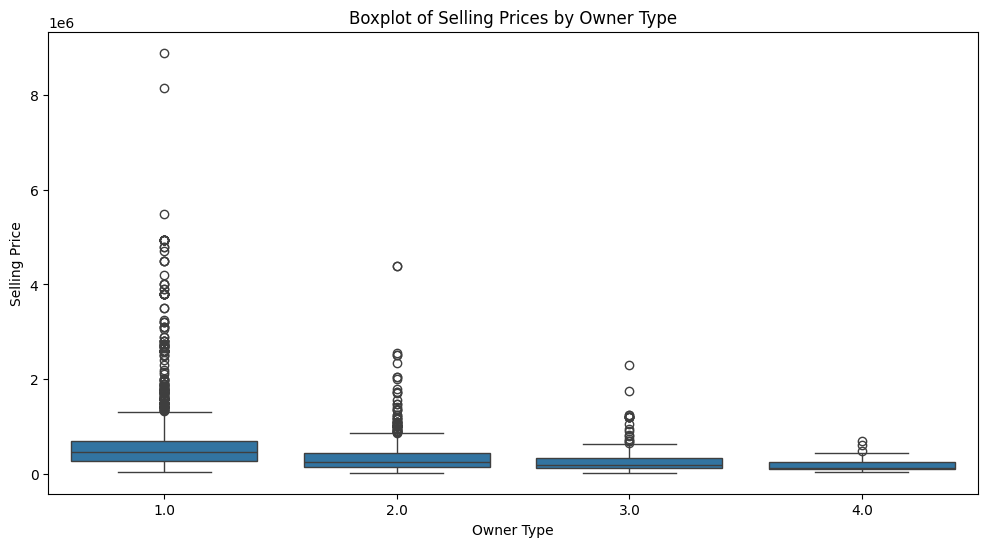

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='owner', y='selling_price', data=df_for_plotting)
plt.title('Boxplot of Selling Prices by Owner Type')
plt.xlabel('Owner Type')
plt.ylabel('Selling Price')
plt.show()

<ipython-input-34-3702157775>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='selling_price', data=df_for_plotting, palette='magma', errorbar=None)
<ipython-input-34-3702157775>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='selling_price', data=df_for_plotting, palette='magma', errorbar=None)
<ipython-input-34-3702157775>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='selling_price', data=df_for_plotting, palette='magma', errorbar=None)


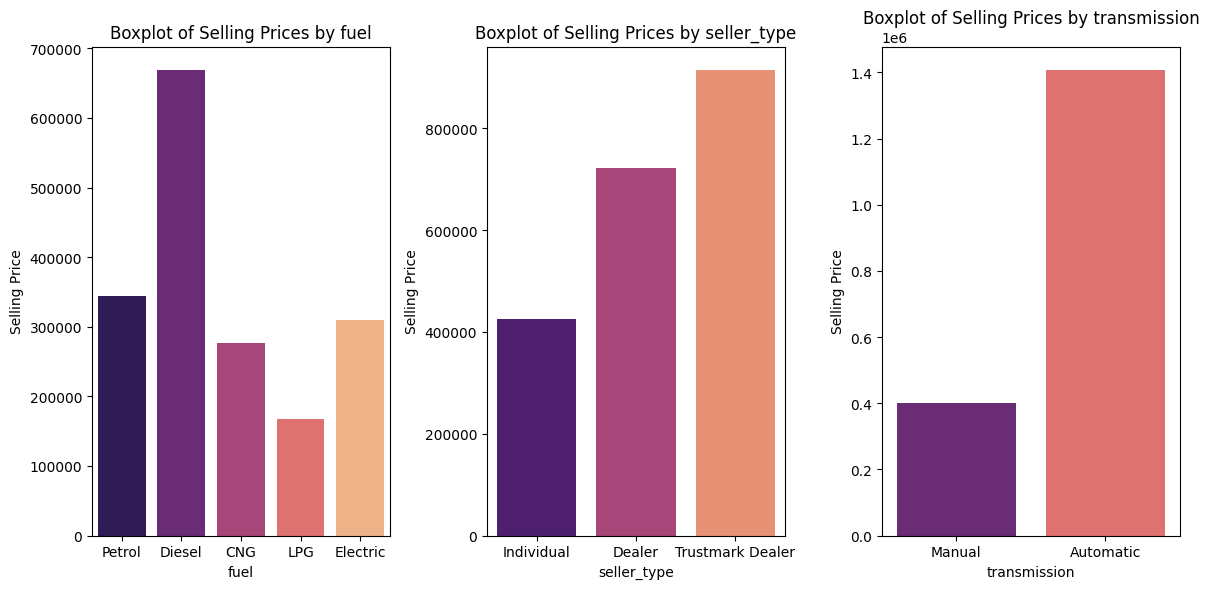

In [34]:
categorical_features_for_plotting =['fuel', 'seller_type', 'transmission']

plt.figure(figsize=(12, 6))
for i, feature in enumerate(categorical_features_for_plotting):
  plt.subplot(1, 3, i+1)
  sns.barplot(x=feature, y='selling_price', data=df_for_plotting, palette='magma', errorbar=None)
  plt.title(f'Boxplot of Selling Prices by {feature}')
  plt.xlabel(feature)
  plt.ylabel('Selling Price')
plt.tight_layout()
plt.show()

<ipython-input-35-2274664059>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='brand', y='selling_price', data=df_for_plotting[df_for_plotting['brand'].isin(top_brands_avg_price.index)], palette='magma', errorbar=None)


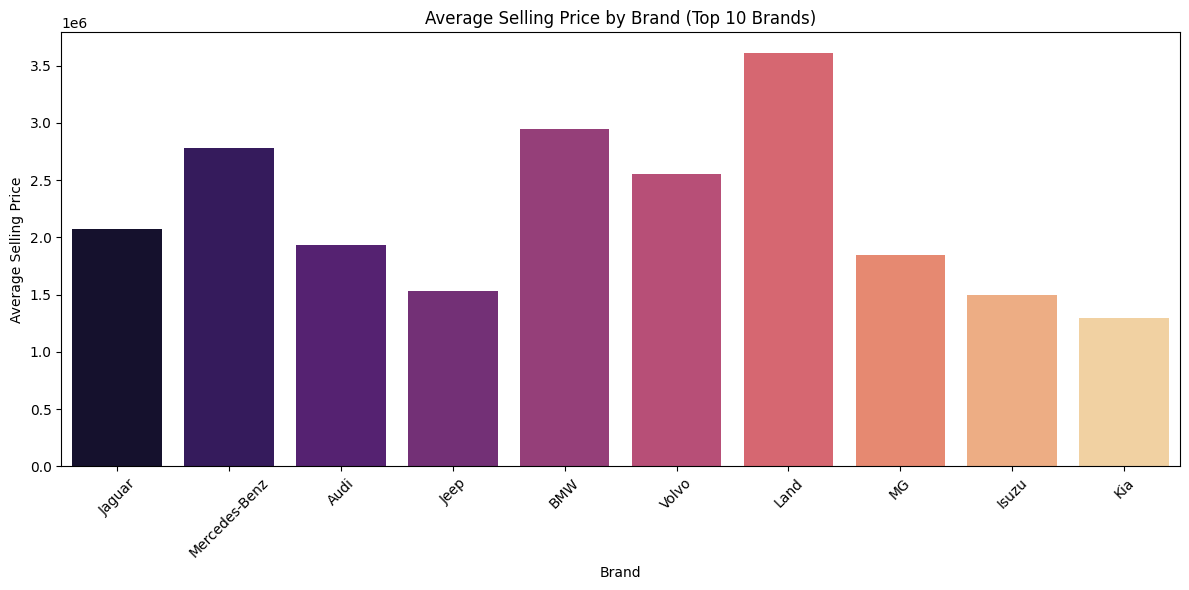

In [35]:
plt.figure(figsize=(12, 6))
top_brands_avg_price =df_for_plotting.groupby('brand')['selling_price'].mean().sort_values(ascending=False).head(10)
sns.barplot(x='brand', y='selling_price', data=df_for_plotting[df_for_plotting['brand'].isin(top_brands_avg_price.index)], palette='magma', errorbar=None)
plt.title('Average Selling Price by Brand (Top 10 Brands)')
plt.xlabel('Brand')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

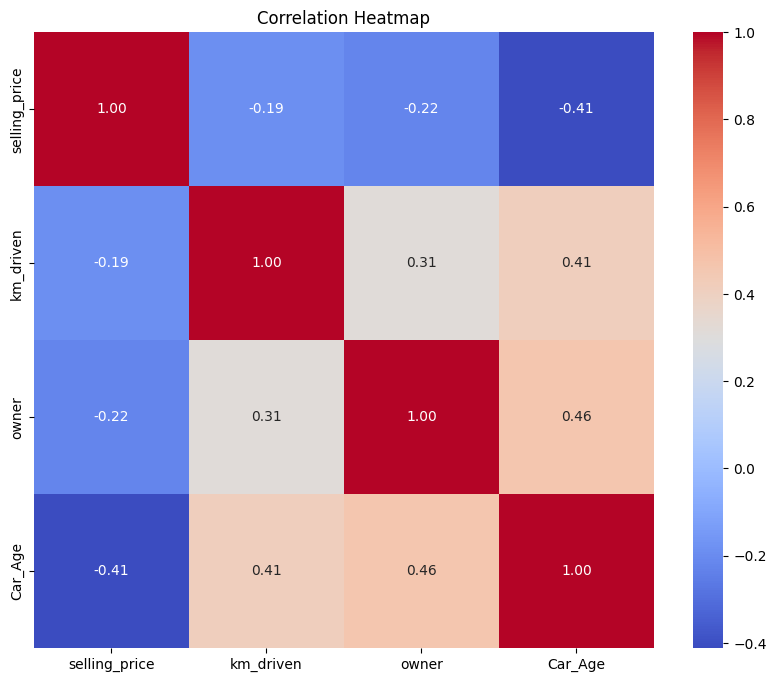

In [36]:
corr_matrix =df_processed.select_dtypes(include=np.number).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [37]:
corr_matrix =df_processed.corr(numeric_only=True)

selling_price_correlations = corr_matrix['selling_price']

# ค่าความสัมพันธ์ Churn ในแต่ละคอลัมท์ (บวกไปลบ)
print("\nCorrelation of 'selling price' with other features (sorted from highest positive to highest negative):")
print(selling_price_correlations.sort_values(ascending=False))


Correlation of 'selling price' with other features (sorted from highest positive to highest negative):
selling_price                   1.000000
brand_BMW                       0.402774
brand_Mercedes-Benz             0.355043
brand_Audi                      0.292995
fuel_Diesel                     0.283885
brand_Land                      0.182714
brand_Toyota                    0.163111
seller_type_Trustmark Dealer    0.110826
brand_Volvo                     0.108005
brand_Jaguar                    0.100931
brand_MG                        0.049820
brand_Jeep                      0.046794
brand_Mahindra                  0.044787
brand_Isuzu                     0.026222
brand_Mitsubishi                0.021750
brand_Kia                       0.020965
brand_Ford                      0.018833
brand_Honda                     0.013971
brand_Skoda                    -0.002696
brand_Force                    -0.004110
fuel_Electric                  -0.005056
brand_Volkswagen               -0.0

## **Feature Engineering & Scaling**

In [40]:
df_processed.head()

,selling_price,km_driven,owner,Car_Age,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,brand_Fiat,...,brand_Toyota,brand_Volkswagen,brand_Volvo,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,60000,70000,1,13,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,True
1,135000,50000,1,13,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,True
2,600000,100000,1,8,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True
3,250000,46000,1,3,False,False,False,False,True,False,...,False,False,False,False,False,False,True,True,False,True
4,450000,141000,2,6,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True


In [43]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4323 entries, 0 to 4339
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   selling_price                 4323 non-null   int64
 1   km_driven                     4323 non-null   int64
 2   owner                         4323 non-null   int64
 3   Car_Age                       4323 non-null   int64
 4   brand_Audi                    4323 non-null   bool 
 5   brand_BMW                     4323 non-null   bool 
 6   brand_Chevrolet               4323 non-null   bool 
 7   brand_Daewoo                  4323 non-null   bool 
 8   brand_Datsun                  4323 non-null   bool 
 9   brand_Fiat                    4323 non-null   bool 
 10  brand_Force                   4323 non-null   bool 
 11  brand_Ford                    4323 non-null   bool 
 12  brand_Honda                   4323 non-null   bool 
 13  brand_Hyundai                 4323 non

In [44]:
df_processed['selling_price_log'] =np.log1p(df_processed['selling_price'])
df_processed['selling_price_log'].skew()

np.float64(0.06681729761553694)

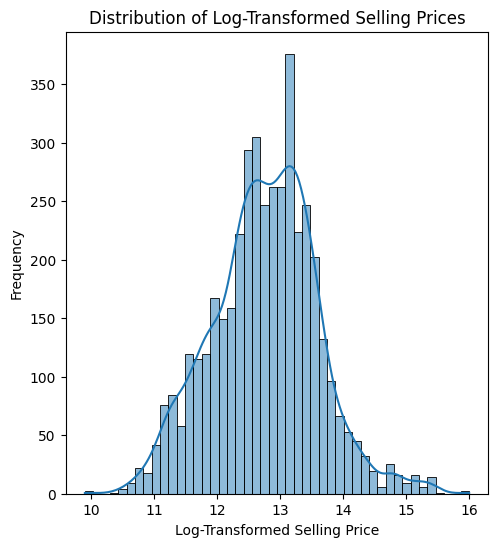

In [46]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_processed['selling_price_log'], kde=True)
plt.title('Distribution of Log-Transformed Selling Prices')
plt.xlabel('Log-Transformed Selling Price')
plt.ylabel('Frequency')
plt.show()

In [47]:
numeric_cols_to_scale =['km_driven', 'Car_Age']

scaler =StandardScaler()
df_processed[numeric_cols_to_scale] =scaler.fit_transform(df_processed[numeric_cols_to_scale])

In [48]:
df_processed.head()

,selling_price,km_driven,owner,Car_Age,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,brand_Fiat,...,brand_Volkswagen,brand_Volvo,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,selling_price_log
0,60000,0.076025,1,1.442997,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,True,11.002117
1,135000,-0.353476,1,1.442997,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,True,11.813037
2,600000,0.720278,1,0.253478,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,True,13.304687
3,250000,-0.439377,1,-0.936041,False,False,False,False,True,False,...,False,False,False,False,False,True,True,False,True,12.429220
4,450000,1.600757,2,-0.222330,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,True,13.017005


## **Model Building & Evaluation**

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

In [50]:
X =df_processed.drop(columns=['selling_price', 'selling_price_log'])
y =df_processed['selling_price_log']

In [53]:
X.shape

(4323, 38)

In [54]:
y.shape

(4323,)

In [55]:
X.head()

,km_driven,owner,Car_Age,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,brand_Fiat,brand_Force,...,brand_Toyota,brand_Volkswagen,brand_Volvo,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,0.076025,1,1.442997,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,True
1,-0.353476,1,1.442997,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,True
2,0.720278,1,0.253478,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True
3,-0.439377,1,-0.936041,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,True,False,True
4,1.600757,2,-0.222330,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True


In [56]:
y.head()

,selling_price_log
0,11.002117
1,11.813037
2,13.304687
3,12.429220
4,13.017005


In [57]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X_train: (3458, 38)
Shape of X_test: (865, 38)
Shape of y_train: (3458,)
Shape of y_test: (865,)


In [59]:
models ={
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

pipelines ={}
for name, model in models.items():
    pipelines[name] = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    print(f"Pipeline created for: {name}")

Pipeline created for: Linear Regression
Pipeline created for: Decision Tree
Pipeline created for: Random Forest
Pipeline created for: Gradient Boosting


In [60]:
scoring_metrics = {
    'R2': 'r2',
    'MAE': 'neg_mean_absolute_error'
}
cv_splitter = KFold(n_splits=5, shuffle=True, random_state=42)

In [62]:
results = {}
for name, pipeline in pipelines.items():
    print(f"\nEvaluating {name}...")
    cv_scores = {}
    for metric_name, scorer in scoring_metrics.items():
        scores = cross_val_score(pipeline, X_train, y_train,
                                 cv=cv_splitter, scoring=scorer, n_jobs=-1) # n_jobs=-1 เพื่อใช้ทุก core CPU
        mean_score = scores.mean()
        std_score = scores.std()

        # MAE ต้องแปลงกลับเป็นค่าบวกเพื่อการตีความที่ถูกต้อง
        if metric_name == 'MAE':
            mean_score = abs(mean_score)
            std_score = abs(std_score)

        cv_scores[metric_name] = {
            'Mean': mean_score,
            'Std': std_score
        }
        print(f"  {metric_name} (Mean +/- Std): {mean_score:.4f} +/- {std_score:.4f}")
    results[name] = cv_scores


--- Starting Cross-Validation for each Model ---

Evaluating Linear Regression...
  R2 (Mean +/- Std): 0.7913 +/- 0.0090
  MAE (Mean +/- Std): 0.3005 +/- 0.0090

Evaluating Decision Tree...
  R2 (Mean +/- Std): 0.7014 +/- 0.0153
  MAE (Mean +/- Std): 0.3168 +/- 0.0102

Evaluating Random Forest...
  R2 (Mean +/- Std): 0.8070 +/- 0.0119
  MAE (Mean +/- Std): 0.2677 +/- 0.0114

Evaluating Gradient Boosting...
  R2 (Mean +/- Std): 0.8010 +/- 0.0081
  MAE (Mean +/- Std): 0.2919 +/- 0.0078


In [66]:
summary_data = []
for name, metrics in results.items():
    summary_data.append({
        'Model': name,
        'R2_Mean': metrics['R2']['Mean'],
        'R2_Std': metrics['R2']['Std'],
        'MAE_Mean': metrics['MAE']['Mean'],
        'MAE_Std': metrics['MAE']['Std']
    })
summary_df.head().sort_values(by='R2_Mean', ascending=False)

,Model,R2_Mean,R2_Std,MAE_Mean,MAE_Std
2,Random Forest,0.806977,0.011942,0.267697,0.011440
3,Gradient Boosting,0.800967,0.008056,0.291900,0.007760
0,Linear Regression,0.791256,0.009003,0.300457,0.009034
1,Decision Tree,0.701393,0.015286,0.316771,0.010208


In [68]:
final_model_pipeline = pipelines['Random Forest']
final_model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestRegressor())])

In [69]:
print("\nMaking predictions on the test set...")
# y_pred_log จะเป็นค่าทำนายในรูปแบบ log scale
y_pred_log = final_model_pipeline.predict(X_test)
print("Predictions made.")


Making predictions on the test set...
Predictions made.


In [70]:
# แปลงค่าทำนาย y_pred_log กลับเป็นราคาจริง (INR)
y_pred_original = np.expm1(y_pred_log) # np.expm1 คือ e^x - 1 ซึ่งเป็นการ inverse ของ np.log1p

# แปลงค่าจริง y_test กลับเป็นราคาจริง (INR) เพื่อใช้ในการประเมินและเปรียบเทียบ
y_test_original = np.expm1(y_test)

print("\nTransformed predictions and true values back to original scale (INR).")


Transformed predictions and true values back to original scale (INR).


In [74]:
print("\n--- Final Model Evaluation on Test Set (Original Price Scale) ---")

# คำนวณ R2 Score
final_r2 = r2_score(y_test_original, y_pred_original)
print(f"Final R2 Score on Test Set: {final_r2:.4f}")

# คำนวณ MAE
final_mae = mean_absolute_error(y_test_original, y_pred_original)
print(f"Final MAE on Test Set: {final_mae:.4f} INR")


--- Final Model Evaluation on Test Set (Original Price Scale) ---
Final R2 Score on Test Set: 0.7193
Final MAE on Test Set: 122213.0036 INR


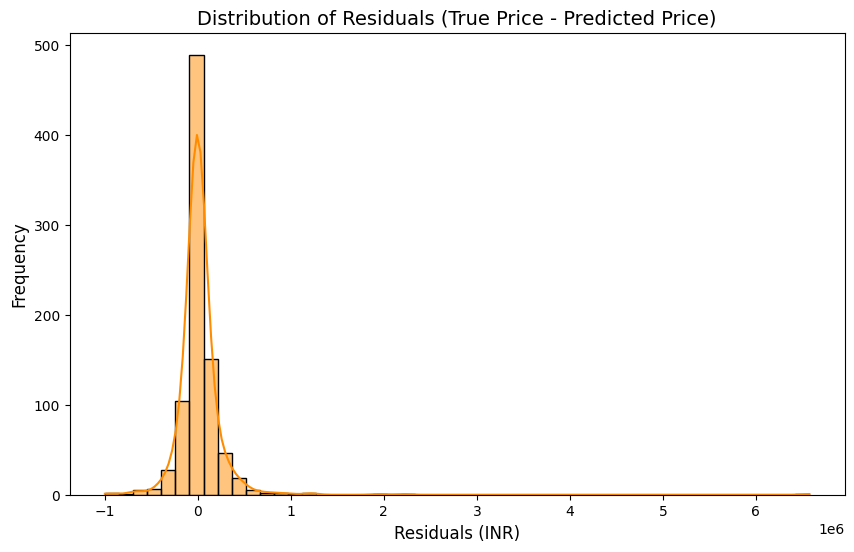

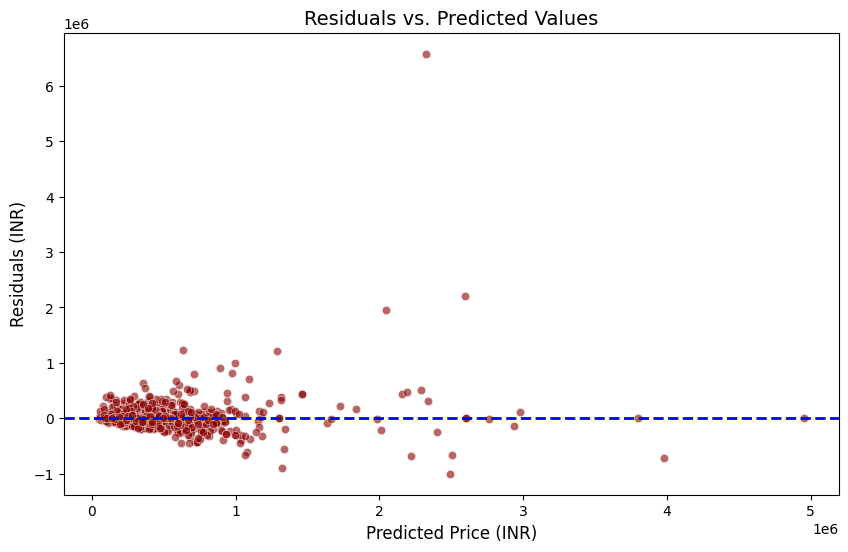

In [75]:
# 8.6 วิเคราะห์ Residuals (ค่าความผิดพลาด)

# Residuals (ความคลาดเคลื่อน) = ค่าจริง - ค่าทำนาย
residuals = y_test_original - y_pred_original

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=50, color='darkorange')
plt.title('Distribution of Residuals (True Price - Predicted Price)', fontsize=14)
plt.xlabel('Residuals (INR)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_original, y=residuals, alpha=0.6, color='darkred')
plt.axhline(y=0, color='blue', linestyle='--', linewidth=2) # เส้นศูนย์
plt.title('Residuals vs. Predicted Values', fontsize=14)
plt.xlabel('Predicted Price (INR)', fontsize=12)
plt.ylabel('Residuals (INR)', fontsize=12)
plt.show()

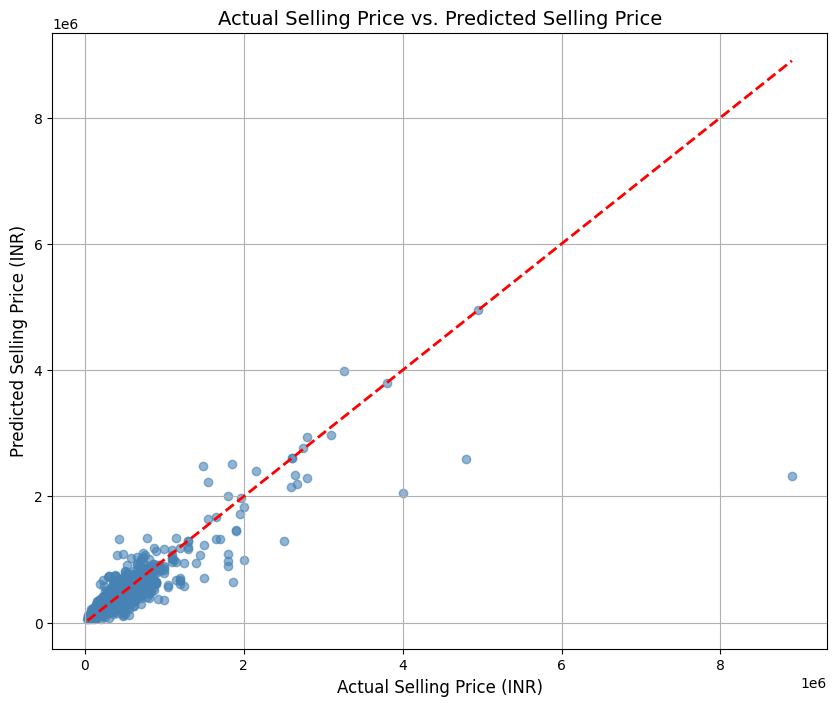


--- Final Model Evaluation and Visualization Completed ---


In [76]:
# การวิเคราะห์ Residuals Plot:
# - กราฟ Histogram: ควรกระจายตัวรอบ 0 และมีรูปร่างคล้าย Normal Distribution (ระฆังคว่ำ)
# - กราฟ Residuals vs Predicted: ควรมีการกระจายตัวแบบสุ่มรอบเส้น 0 และไม่มีรูปแบบที่ชัดเจน
#   (เช่น ไม่เป็นรูปพัด หรือมีแนวโน้มขึ้น/ลง) หากมีรูปแบบ แสดงว่าโมเดลอาจจะยังจับรูปแบบบางอย่างไม่ได้


# 8.7 Visualization: เปรียบเทียบค่าจริง vs ค่าทำนาย

plt.figure(figsize=(10, 8))
plt.scatter(y_test_original, y_pred_original, alpha=0.6, color='steelblue')
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()],
         '--r', linewidth=2) # เส้น y=x (ค่าจริง = ค่าทำนาย)
plt.title('Actual Selling Price vs. Predicted Selling Price', fontsize=14)
plt.xlabel('Actual Selling Price (INR)', fontsize=12)
plt.ylabel('Predicted Selling Price (INR)', fontsize=12)
plt.grid(True)
plt.show()

# การวิเคราะห์ Actual vs Predicted Plot:
# จุดข้อมูลควรเกาะกลุ่มอยู่รอบเส้นสีแดง y=x มากที่สุด ยิ่งเกาะกลุ่มมากยิ่งดี แสดงว่าทำนายแม่นยำ

print("\n--- Final Model Evaluation and Visualization Completed ---")

## **Model Deployment**

In [78]:
import joblib

In [79]:
model_filename = 'car_price_prediction_pipeline.joblib'
joblib.dump(final_model_pipeline, model_filename)

['car_price_prediction_pipeline.joblib']

In [80]:
feature_names = X_train.columns.tolist()
joblib.dump(feature_names, 'feature_names.joblib')

['feature_names.joblib']